# Machine Learning 

### Of course this Model is not well trained.It is just for the sake of example how the Linear regression works.

## Linear Regression

In [21]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [22]:
# Sample dataset for house sale price prediction
data = {
    'area': [1200, 1500, 800, 950, 1100, 1300, 1450, 1700, 1600, 1000],
    'bedrooms': [2, 3, 2, 2, 3, 3, 4, 4, 3, 2],
    'age': [10, 5, 15, 7, 12, 8, 4, 3, 6, 14],
    'sale_price': [200000, 250000, 150000, 170000, 210000, 230000, 260000, 300000, 270000, 160000]
}

df = pd.DataFrame(data)
print(df)

   area  bedrooms  age  sale_price
0  1200         2   10      200000
1  1500         3    5      250000
2   800         2   15      150000
3   950         2    7      170000
4  1100         3   12      210000
5  1300         3    8      230000
6  1450         4    4      260000
7  1700         4    3      300000
8  1600         3    6      270000
9  1000         2   14      160000



Missing Values:
 area          0
bedrooms      0
age           0
sale_price    0
dtype: int64

Descriptive Statistics:
               area   bedrooms        age    sale_price
count    10.000000  10.000000  10.000000      10.00000
mean   1260.000000   2.800000   8.400000  220000.00000
std     299.814758   0.788811   4.195235   50552.50296
min     800.000000   2.000000   3.000000  150000.00000
25%    1025.000000   2.000000   5.250000  177500.00000
50%    1250.000000   3.000000   7.500000  220000.00000
75%    1487.500000   3.000000  11.500000  257500.00000
max    1700.000000   4.000000  15.000000  300000.00000


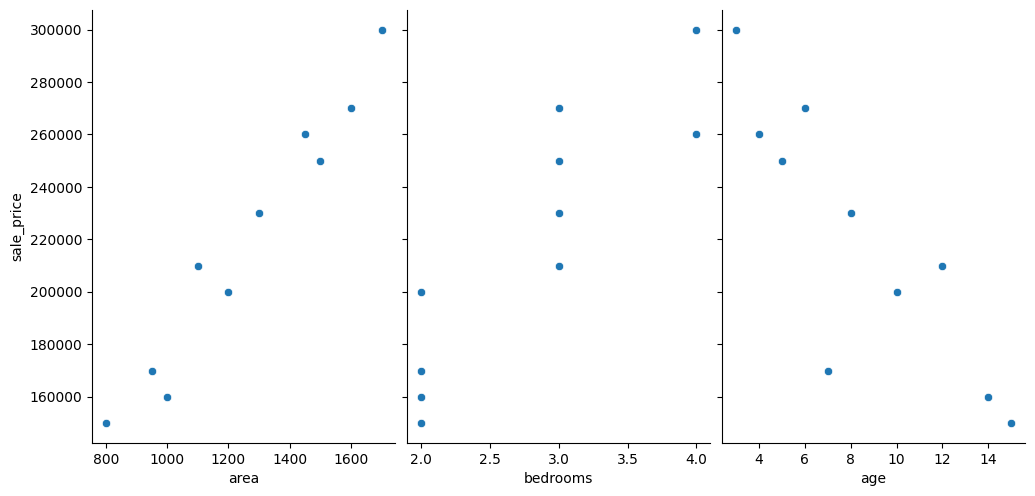

In [23]:
# Checking for missing values and outliers
print("\nMissing Values:\n", df.isnull().sum())
print("\nDescriptive Statistics:\n", df.describe())
# Visualizing the data using scatter plots
sns.pairplot(df, x_vars=['area', 'bedrooms', 'age'], y_vars='sale_price', height=5, aspect=0.7)
plt.show()


Model Evaluation:
Mean Squared Error: 19994187.22
Root Mean Squared Error: 4471.49
R-squared: 0.80


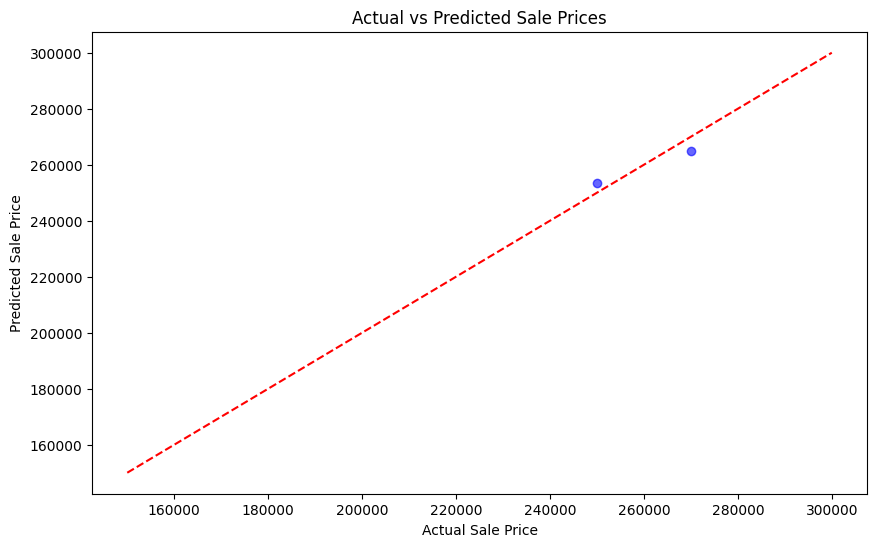

In [24]:

# Splitting the dataset into features and target variable
X = df[['area', 'bedrooms', 'age']]
y = df['sale_price']
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Making predictions on the test set
y_pred = model.predict(X_test_scaled)
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
# Visualizing the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

In [25]:
# Let's remove the outliers using the IQR method
Q1 = df['sale_price'].quantile(0.25)
Q3 = df['sale_price'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df['sale_price'] < (Q1 - 1.5 * IQR)) | (df['sale_price'] > (Q3 + 1.5 * IQR)))]
print("\nData after removing outliers:\n", df_no_outliers)



Data after removing outliers:
    area  bedrooms  age  sale_price
0  1200         2   10      200000
1  1500         3    5      250000
2   800         2   15      150000
3   950         2    7      170000
4  1100         3   12      210000
5  1300         3    8      230000
6  1450         4    4      260000
7  1700         4    3      300000
8  1600         3    6      270000
9  1000         2   14      160000



Model Evaluation:
Mean Squared Error: 19994187.22
Root Mean Squared Error: 4471.49
R-squared: 0.80


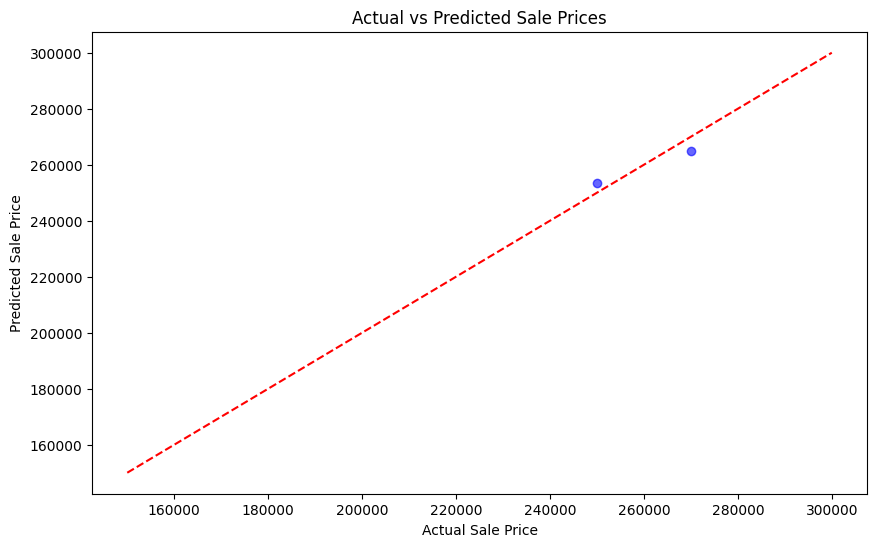

In [26]:
# Splitting the dataset into features and target variable
X = df[['area', 'bedrooms', 'age']]
y = df['sale_price']
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Making predictions on the test set
y_pred = model.predict(X_test_scaled)
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
# Visualizing the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

In [27]:
# Predict the sale price of a new house
new_house = np.array([[1100, 3, 12]])  # Example: 1100 sqft, 3 bedrooms, 12 years old
new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)
print(f"\nPredicted Sale Price for the new house: ${predicted_price[0]:.0f}")



Predicted Sale Price for the new house: $202950


c:\Users\Lenovo\miniconda3\envs\AI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [28]:
import pickle
# Save the model 
model_filename = 'Models/House_sale_price_prediction_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)